Feedback dari anda diperlukan! bantu kami dalam [meningkatkan modul ini](https://forms.gle/pWJd6y4hY4KWMcno6).

# Integrasi Numerik

Sebelumnya, metode diferensiasi numerik digunakan untuk memperkirakan turunan suatu fungsi dari titik-titik nilai fungsi yang diketahui. Pada bagian ini, integrasi numerik menggunakan informasi yang sama untuk menghitung perkiraan numerik ke integral fungsi. Penggunaan penting dari kedua jenis metode ini adalah estimasi derivatif dan integral untuk fungsi yang hanya diketahui pada titik-titik yang terisolasi, seperti halnya dengan misalnya data pengukuran. Perbedaan penting antara diferensiasi dan integrasi adalah sebagian besar fungsi sukar (malahan seringkali tidak mungkin) untuk menentukan integral tak tentu melalui metode simbolik, tetapi kita masih dapat menghitung perkiraan numerik untuk hampir semua integral tentu.

Metode integrasi numerik karenanya lebih berguna daripada metode diferensiasi numerik, dan sangat penting dalam banyak situasi praktis. Kita akan menggunakan strategi umum yang sama untuk memperoleh metode integrasi numerik seperti yang dilakukan untuk metode diferensiasi numerik: pertama kita mencari polinom yang menginterpolasi fungsi pada beberapa titik yang sesuai, dan menggunakan integral dari polinomial tersebut sebagai perkiraan untuk fungsi. Ini berarti bahwa galat pemotongan pada dasarnya dapat dianalisa dengan cara yang sama seperti untuk diferensiasi numerik. Namun, ketika datang ke kesalahan pembulatan, metode integrasi berperilaku berbeda dari diferensiasi: Integrasi numerik tidak sensitif terhadap kesalahan pembulatan, yang selanjutnya dapat diabaikan dalam analisis. [[1]](https://www.uio.no/studier/emner/matnat/math/MAT-INF1100/h10/kompendiet/kap12.pdf)

## Alasan integrasi numerik

Ada beberapa alasan untuk melakukan integrasi numerik.

* Integrand $f(x)$ hanya dapat diketahui pada titik-titik tertentu, seperti yang diperoleh dengan sampling. Beberapa sistem tertanam dan aplikasi komputer lainnya mungkin memerlukan integrasi numerik untuk alasan ini.
* Rumus untuk integrand mungkin diketahui, tetapi mungkin sulit atau tidak mungkin untuk menemukan antiderivatif yang merupakan fungsi elementer. Contoh dari integand tersebut adalah $f(x) = exp(−x^2)$, yang antiderivatifnya tidak dapat ditulis dalam bentuk elementer.
* Dimungkinkan untuk menemukan antiderivatif secara simbolis, tetapi mungkin lebih mudah untuk menghitung perkiraan numerik daripada menghitung antiderivatif. Itu mungkin terjadi jika antiderivatif diberikan sebagai rangkaian atau produk tanpa batas, atau jika evaluasinya memerlukan fungsi khusus yang tidak tersedia.

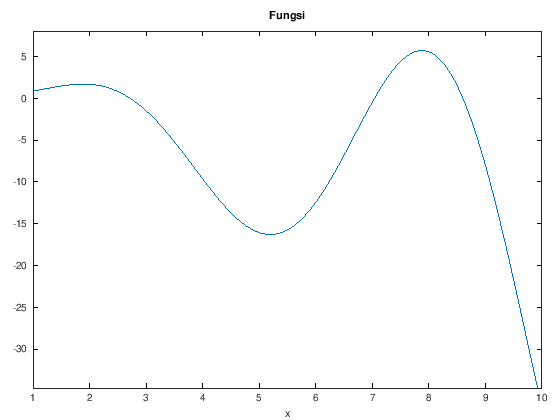

In [3]:
format long

f = @(x) sin(x).*x.^(1.45) - x.^(1.5) + x;
ezplot(f, [1,10])
title('Fungsi')

## Metode Newton Cotes

### Metode Trapesium

In [4]:
function I = integral_trapesium(f, a, b, n)
    h = (b-a)/n;
    I = 0;
    for j = 0:n-1
        I = I + f(a + j*h) + f(a + (j+1)*h);
    end
    I = I*h/2;
end

In [5]:
N = 15;
result = zeros(N);
for i = 1:N
    result(i) = integral_trapesium(f, 1, 10, 2^i);
end

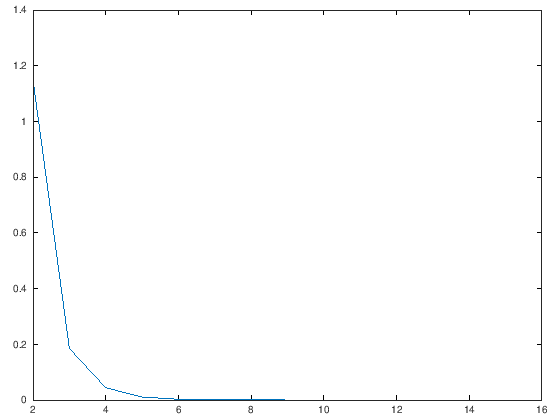

In [6]:
err = abs((result(2:N) - result(1:N-1))./result(2:N));
plot(2:N, err)

In [7]:
disp([err(N-1); result(N-1)])

   1.03207657446856e-08
  -5.64188830985935e+01


### Metode Trapesium Rekursif

In [8]:
function I = integral_trapesium_rekursif(f, a, b, eps)
    maxiter = 50;
    h = b-a;
    I = (f(a)+f(b))*h/2;
    n = 1;
    
    for iteration = 1:maxiter
        n = n*2;
        h = h/2;
        
        tot = 0;
        for i=1:n/2
            tot = tot + f(a + (2*i-1)*h);
        end
        
        T = I/2 + h*tot;
        if abs((T-I)/T) < eps
            I = T;
            break
        end
        I = T;
    end
    
    iteration
end

In [9]:
integral_trapesium_rekursif(f, 1, 10, 10^-3)

iteration =  7
ans = -56.4316036835012


### Metode Simpson

In [10]:
function I = integral_simpson13(f, a, b, n)
    % n : kelipatan tiga
    h = (b-a)/n;
    I = 0;
    for j = 0:2:n-2
        I = I + f(a + j*h) + 4*f(a + (j+1)*h) + f(a + (j+2)*h);
    end
    I = I*h/3;
end

In [11]:
N = 15;
result = zeros(N);
for i = 1:N
    result(i) = integral_simpson13(f, 1, 10, 2^i + mod(i+1, 2) + 1);
end

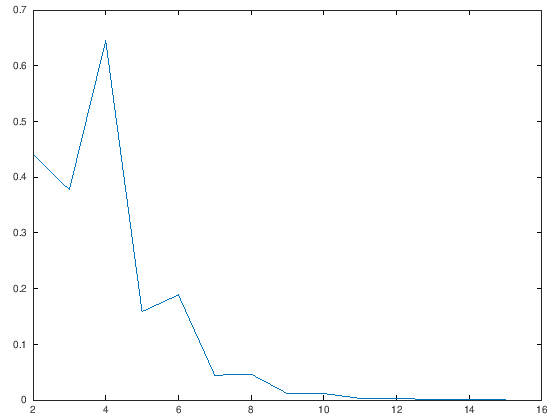

In [12]:
err = abs((result(2:N) - result(1:N-1))./result(1:N-1));
plot(2:N, err)

In [13]:
disp([err(N-1); result(N-1)])

   1.79880736100276e-04
  -5.64188823222119e+01


In [14]:
function I = integral_simpson38(f, a, b, n)
    % n : kelipatan empat
    h = (b-a)/n;
    I = 0;
    for j = 0:3:n-3
        I = I + f(a + j*h) + 3*(f(a + (j+1)*h) + f(a + (j+2)*h)) + f(a + (j+3)*h);
    end
    I = I*3*h/8;
end

In [15]:
N = 15;
result = zeros(N);
for i = 2:N
    result(i) = integral_simpson38(f, 1, 10, 2^i);
end

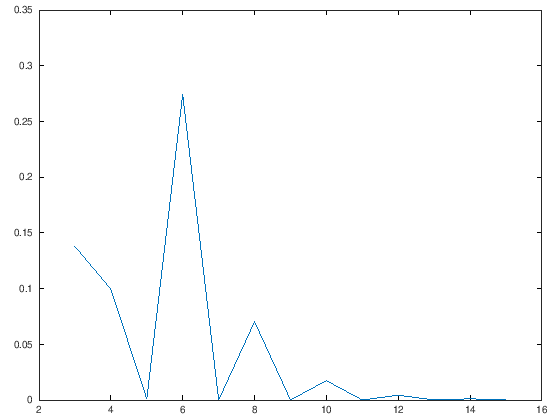

In [16]:
err = abs((result(2:N) - result(1:N-1))./result(1:N-1));
plot(2:N, err)

In [17]:
disp([err(N-1); result(N-1)])

   2.26774641270533e-15
  -5.63985865969208e+01


### Metode Simpson Rekursif

In [18]:
function I = integral_simpson_rekursif(f, a, b, eps)
    maxiter = 50;
    n = 2;
    h = (b-a)/2;
    
    T0 = (f(a) + f(b))*h;            % Trapesium pertama
    T1 = T0/2 + f( (a+b)/2 )*h;      % Trapesium kedua
    I  = (4*T1 - T0)/3;              % Simpson pertama
    
    for iteration = 1:maxiter
        % Trapesium selanjutnya
        n = n*2;
        h = h/2;
        
        tot = 0;
        for i=1:n/2
            tot = tot + f(a + (2*i-1)*h);
        end
        
        T0 = T1;
        T1 = T0/2 + h*tot;
        
        % Simpson kedua
        S = (4*T1 - T0)/3;
        
        % Update nilai integral
        if abs((S-I)/S) < eps
            I = S;
            break
        end
        I = S;
    end
    
    iteration
end

In [19]:
integral_simpson_rekursif(f, 1, 10, 10^-3)

iteration =  4
ans = -56.4177236817051


### Metode Boole

In [ ]:
% O.K.

### Metode Romberg

In [20]:
function I = integral_romberg(f, a, b, eps, maxiter)
    h = b-a;
    n = 1;
    
    R = zeros(maxiter, maxiter);    
    R(1, 1) = (f(a) + f(b))*h/2;
    
    for j = 2:maxiter
    
        % Trapesium selanjutnya
        n = n*2;
        h = h/2;
        
        tot = 0;
        for i = 1:n/2
            tot = tot + f(a + (2*i-1)*h);
        end
        
        R(j,1) = R(j-1, 1)/2 + h*tot;
        
        % Romberg
        for k = 2:j
            R(j, k) = (4^k * R(j, k-1) - R(j-1, k-1))/(4^k-1);
        end
        
        err = abs((R(j, j) - R(j-1, j-1))/R(j, j));
        if err < eps
            break
        end
        
    end
    
    I = R(j, j);
    iteration = j
end

In [21]:
integral_romberg(f, 1, 10, 10^-4, 15)

iteration =  10
ans = -56.4194785841634


### Metode Gauss-Legendre

https://rosettacode.org/wiki/Numerical_integration/Gauss-Legendre_Quadrature#Python

## Metode Adaptif

https://en.wikipedia.org/wiki/Adaptive_quadrature

# Tambahan

* https://www.mathworks.com/matlabcentral/answers/439985-shade-area-under-curve-between-two-x-values
* https://www.mathworks.com/help/matlab/ref/area.html